# Example 5 
## Load toy Datasets and do some basic statistics
Lets try the wine toy dataset from scikit-learn. 

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from sklearn.datasets import load_wine
# from sklearn.model_selection import train_test_split
from pprint import pprint
import matplotlib.pyplot as plt
import math

In [4]:
df = load_wine(as_frame=True)
df_colms = df.keys()
print(df_colms)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [5]:
data = df.data
target = df.target
targetNames = df.target_names
features = df.feature_names
DESCR = df.DESCR
frame = df.frame

In [6]:
frame.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [7]:
print(f'{("Feature" + " "*30)[:31]} Min   Max    Mean  SD')
for feature in features:
    colm = data[feature]
    origDescr = DESCR.lower().find(feature.replace('_', ' ').replace('color', 'colour')+':')
    print(f"{(feature+' '*30)[:29]}: {DESCR[origDescr+30:origDescr+54]}")

Feature                         Min   Max    Mean  SD
alcohol                      : 11.0  14.8    13.0   0.8
malic_acid                   : 0.74  5.80    2.34  1.12
ash                          : 1.36  3.23    2.36  0.27
alcalinity_of_ash            : 10.6  30.0    19.5   3.3
magnesium                    : 70.0 162.0    99.7  14.3
total_phenols                : 0.98  3.88    2.29  0.63
flavanoids                   : 0.34  5.08    2.03  1.00
nonflavanoid_phenols         : 0.13  0.66    0.36  0.12
proanthocyanins              : 0.41  3.58    1.59  0.57
color_intensity              :  1.3  13.0     5.1   2.3
hue                          : 0.48  1.71    0.96  0.23
od280/od315_of_diluted_wines : 1.27  4.00    2.61  0.71
proline                      :  278  1680     746   315


# The Middle

* Mean: Average $\mu = \sum_{i}^{n} \frac{x_{i}}{n}$
* Median: Middle. There are the same number of records before and after.
* Mode(s): Most common value(s).

In [8]:
print(f'{("Feature" + " "*30)[:31]} Mean   Sum/Size   Median      Mode(s)')
for feature in features:
    colm = data[feature]
    mode = '(' + str(colm.mode())
    mode = mode.replace('\nName', '  Name')[:mode.find("\nName")]
    mode = mode.replace('\n', ') , (') + ')'
    print(f'{(feature+" "*30)[:29]}', end=' | ')
    print(f' {round(colm.mean(), 1)}', end='  | ')
    print(f' {round(colm.sum()/colm.size, 1)}', end='   | ')
    print(f' {round(colm.median(), 1)}', end='     | ')
    print(f' {mode}')

Feature                         Mean   Sum/Size   Median      Mode(s)
alcohol                       |  13.0  |  13.0   |  13.1     |  (0    12.37) , (1    13.05)
malic_acid                    |  2.3  |  2.3   |  1.9     |  (0    1.73)
ash                           |  2.4  |  2.4   |  2.4     |  (0    2.28) , (1    2.30)
alcalinity_of_ash             |  19.5  |  19.5   |  19.5     |  (0    20.0)
magnesium                     |  99.7  |  99.7   |  98.0     |  (0    88.0)
total_phenols                 |  2.3  |  2.3   |  2.4     |  (0    2.2)
flavanoids                    |  2.0  |  2.0   |  2.1     |  (0    2.65)
nonflavanoid_phenols          |  0.4  |  0.4   |  0.3     |  (0    0.26) , (1    0.43)
proanthocyanins               |  1.6  |  1.6   |  1.6     |  (0    1.35)
color_intensity               |  5.1  |  5.1   |  4.7     |  (0    2.6) , (1    3.8) , (2    4.6)
hue                           |  1.0  |  1.0   |  1.0     |  (0    1.04)
od280/od315_of_diluted_wines  |  2.6  |  2.6   |  

# Variability:

* Range

In [9]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end='')
    print(f'  Range: [{colm.min()},{colm.max()}]')

alcohol  Range: [11.03,14.83]
malic_acid  Range: [0.74,5.8]
ash  Range: [1.36,3.23]
alcalinity_of_ash  Range: [10.6,30.0]
magnesium  Range: [70.0,162.0]
total_phenols  Range: [0.98,3.88]
flavanoids  Range: [0.34,5.08]
nonflavanoid_phenols  Range: [0.13,0.66]
proanthocyanins  Range: [0.41,3.58]
color_intensity  Range: [1.28,13.0]
hue  Range: [0.48,1.71]
od280/od315_of_diluted_wines  Range: [1.27,4.0]
proline  Range: [278.0,1680.0]


* Standard Deviation: $\sigma = \sqrt{\sum_{i}^{n}{\dfrac{(x_{i}-\mu)^{2}}{n-1}}}$

In [10]:
for feature in features:
    colm = data[feature]
    print(f'{feature}', end=' ')
    print(f'  SD: {round(colm.std(),2)}')
    

alcohol   SD: 0.81
malic_acid   SD: 1.12
ash   SD: 0.27
alcalinity_of_ash   SD: 3.34
magnesium   SD: 14.28
total_phenols   SD: 0.63
flavanoids   SD: 1.0
nonflavanoid_phenols   SD: 0.12
proanthocyanins   SD: 0.57
color_intensity   SD: 2.32
hue   SD: 0.23
od280/od315_of_diluted_wines   SD: 0.71
proline   SD: 314.91


* Draw Histograms of Features to better understand data

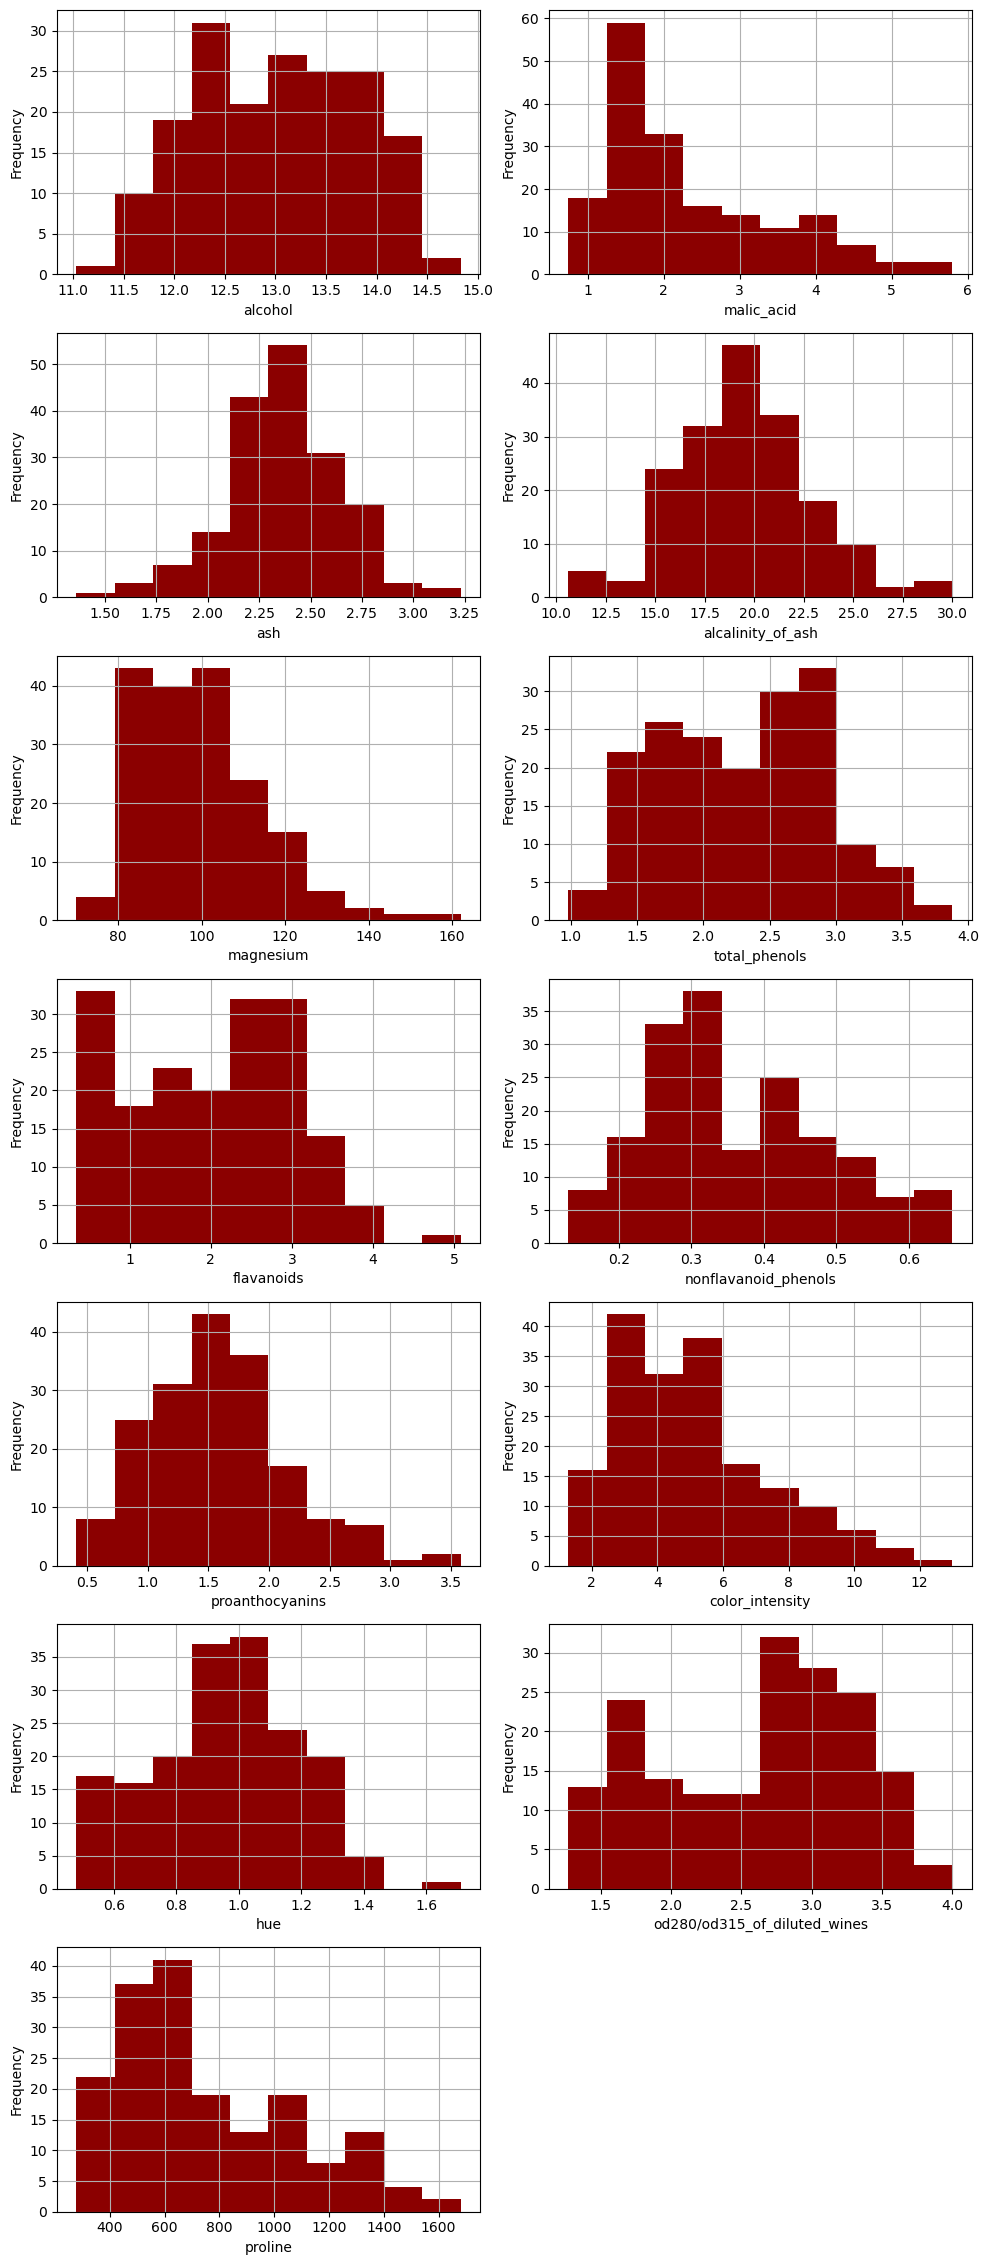

In [11]:
h =[]
nfeatures = len(features)
f = plt.figure(figsize=(10,1.75*nfeatures))
for nth_feat, feature in enumerate(features):
    plt.subplot(int(nfeatures/2)+1, 2, nth_feat+1)
    colm = data[feature]
    hsub = h.append(colm.hist(color='darkRed'))
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.close()

* Draw scatter plots of featurees to see correlations

<Figure size 6500x6500 with 0 Axes>

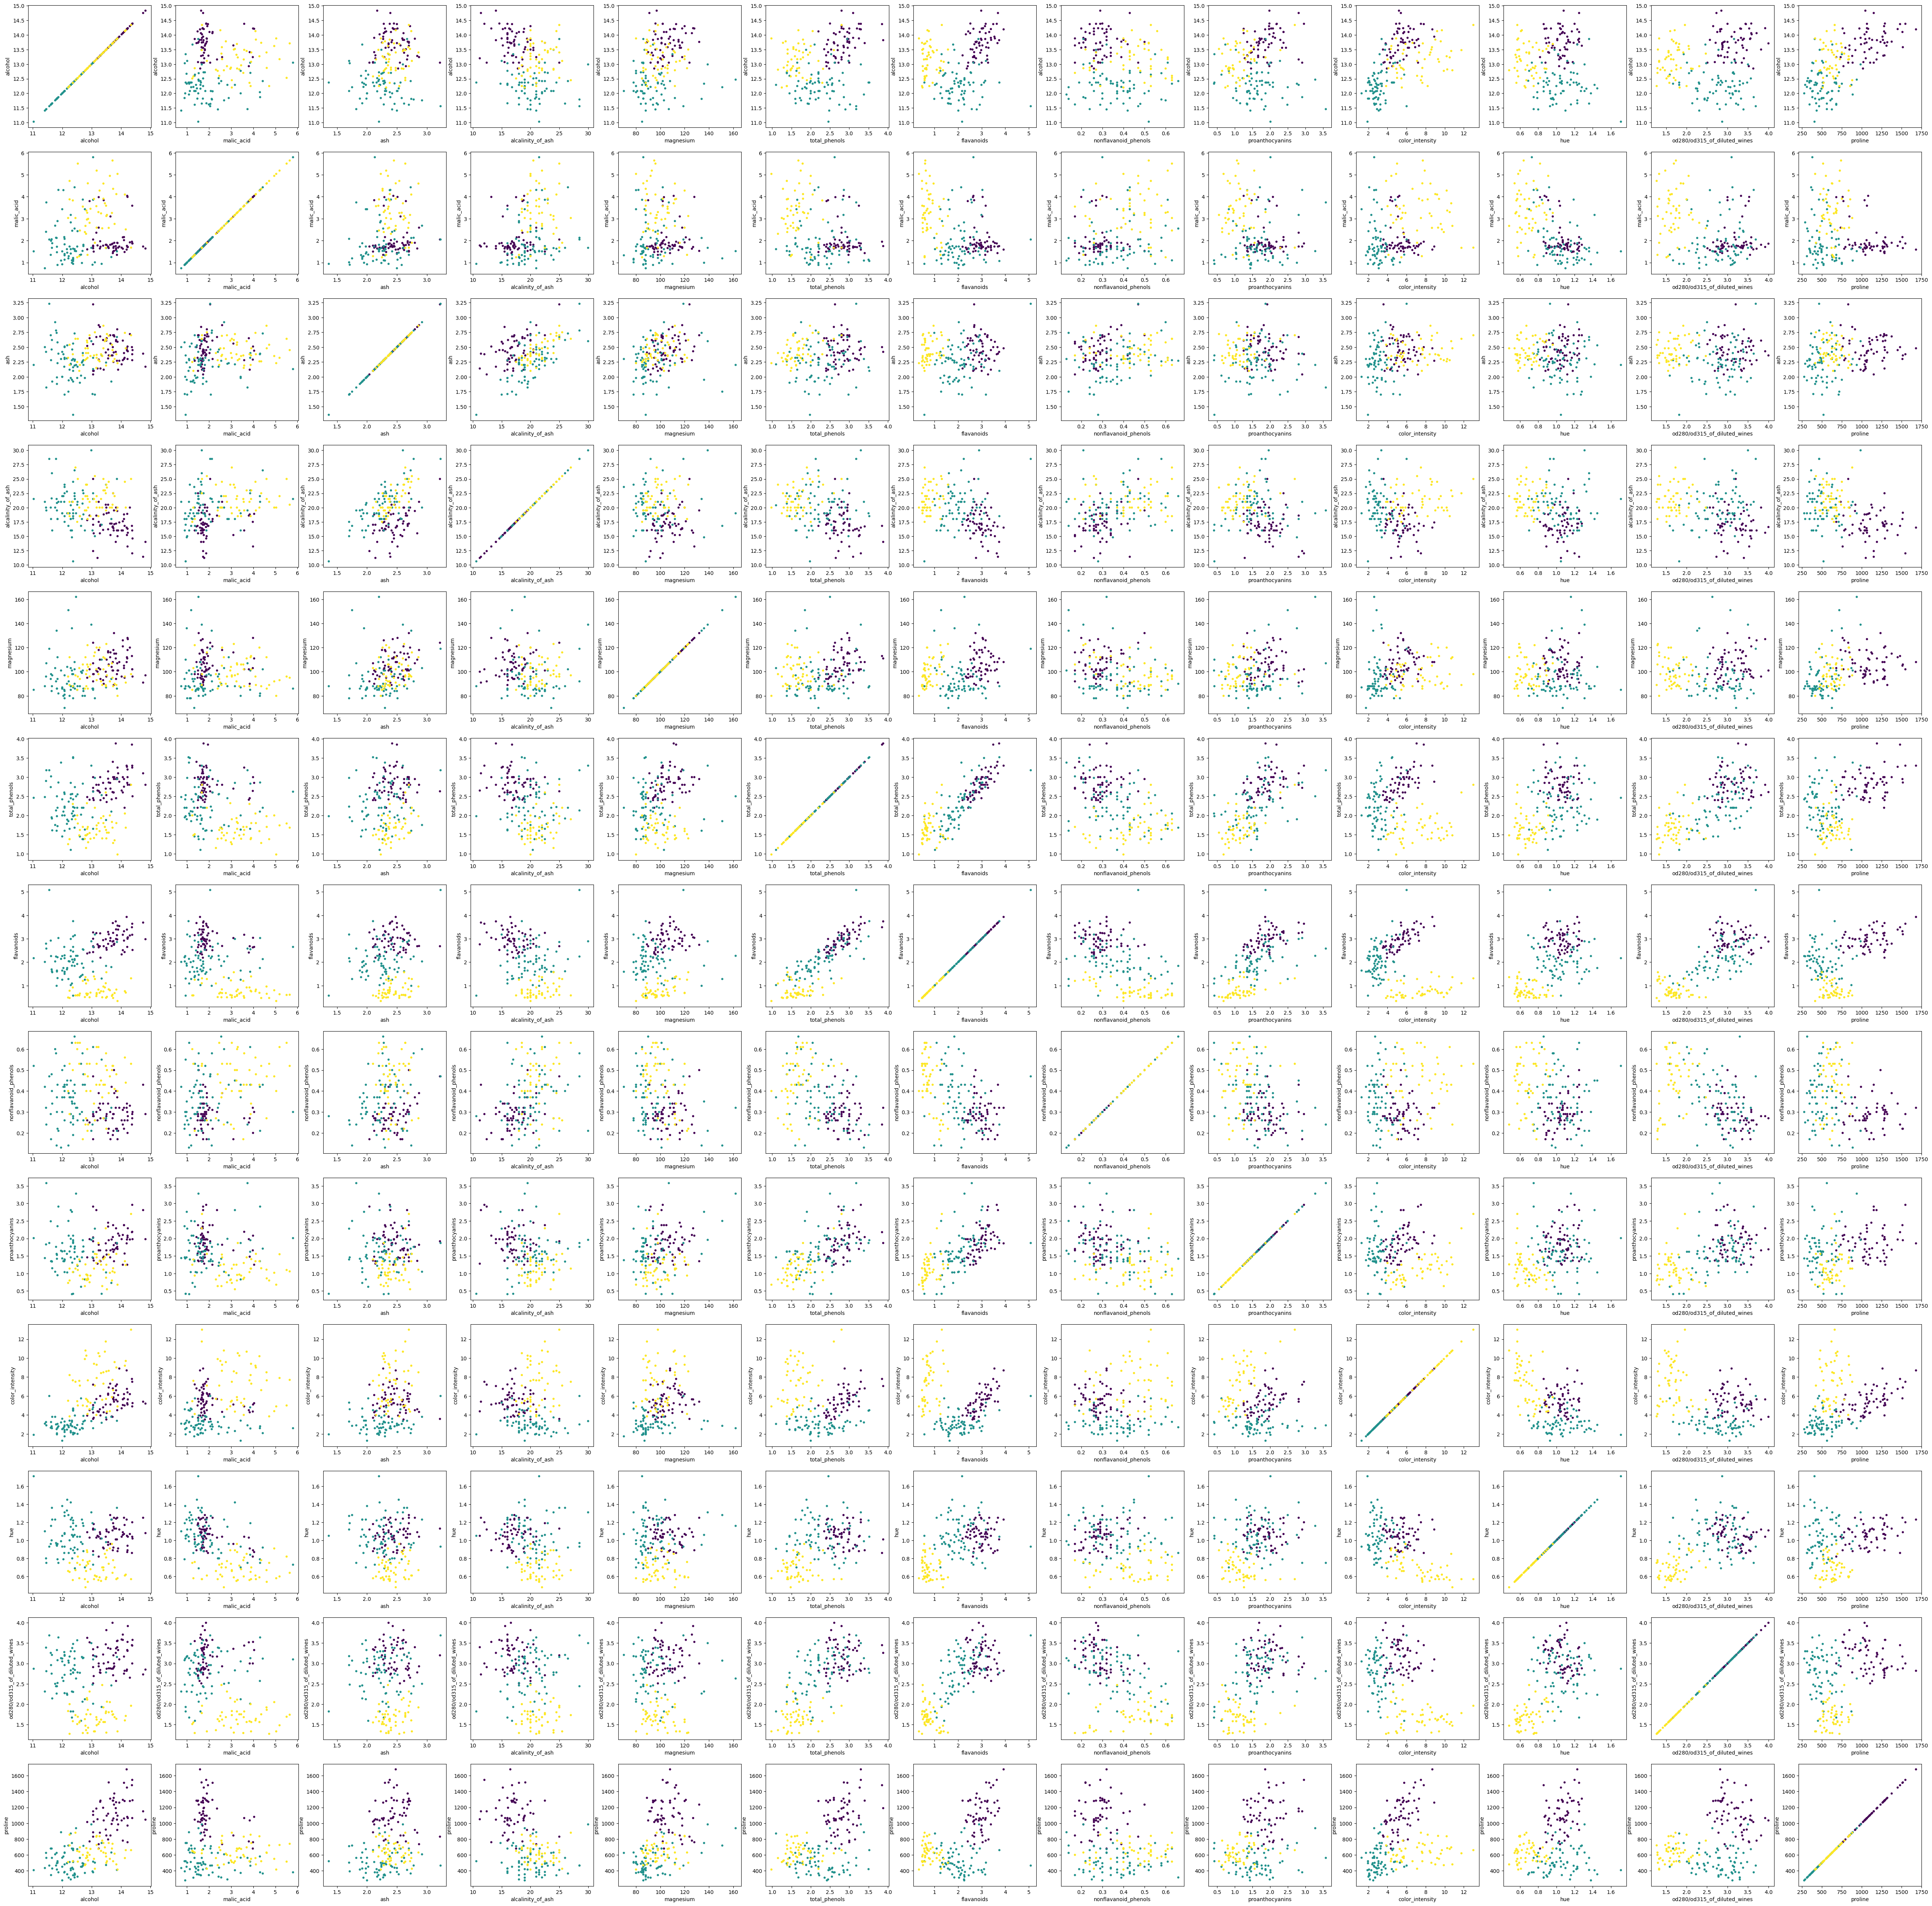

In [12]:
f = plt.figure(figsize=(5*nfeatures,5*nfeatures))
f, axes = plt.subplots(nfeatures, nfeatures, figsize=(5*nfeatures,5*nfeatures))
for nth_featVert, featureVert in enumerate(features):
    for nth_feat, feature in enumerate(features):
        axes[nth_featVert][nth_feat].scatter(x=frame[feature], y=frame[featureVert], c=frame["target"], s=10)
        axes[nth_featVert][nth_feat].set_xlabel(feature)
        axes[nth_featVert][nth_feat].set_ylabel(featureVert)
plt.tight_layout()
plt.show()
plt.close()

* Draw Probability Density Functions (PDFs)

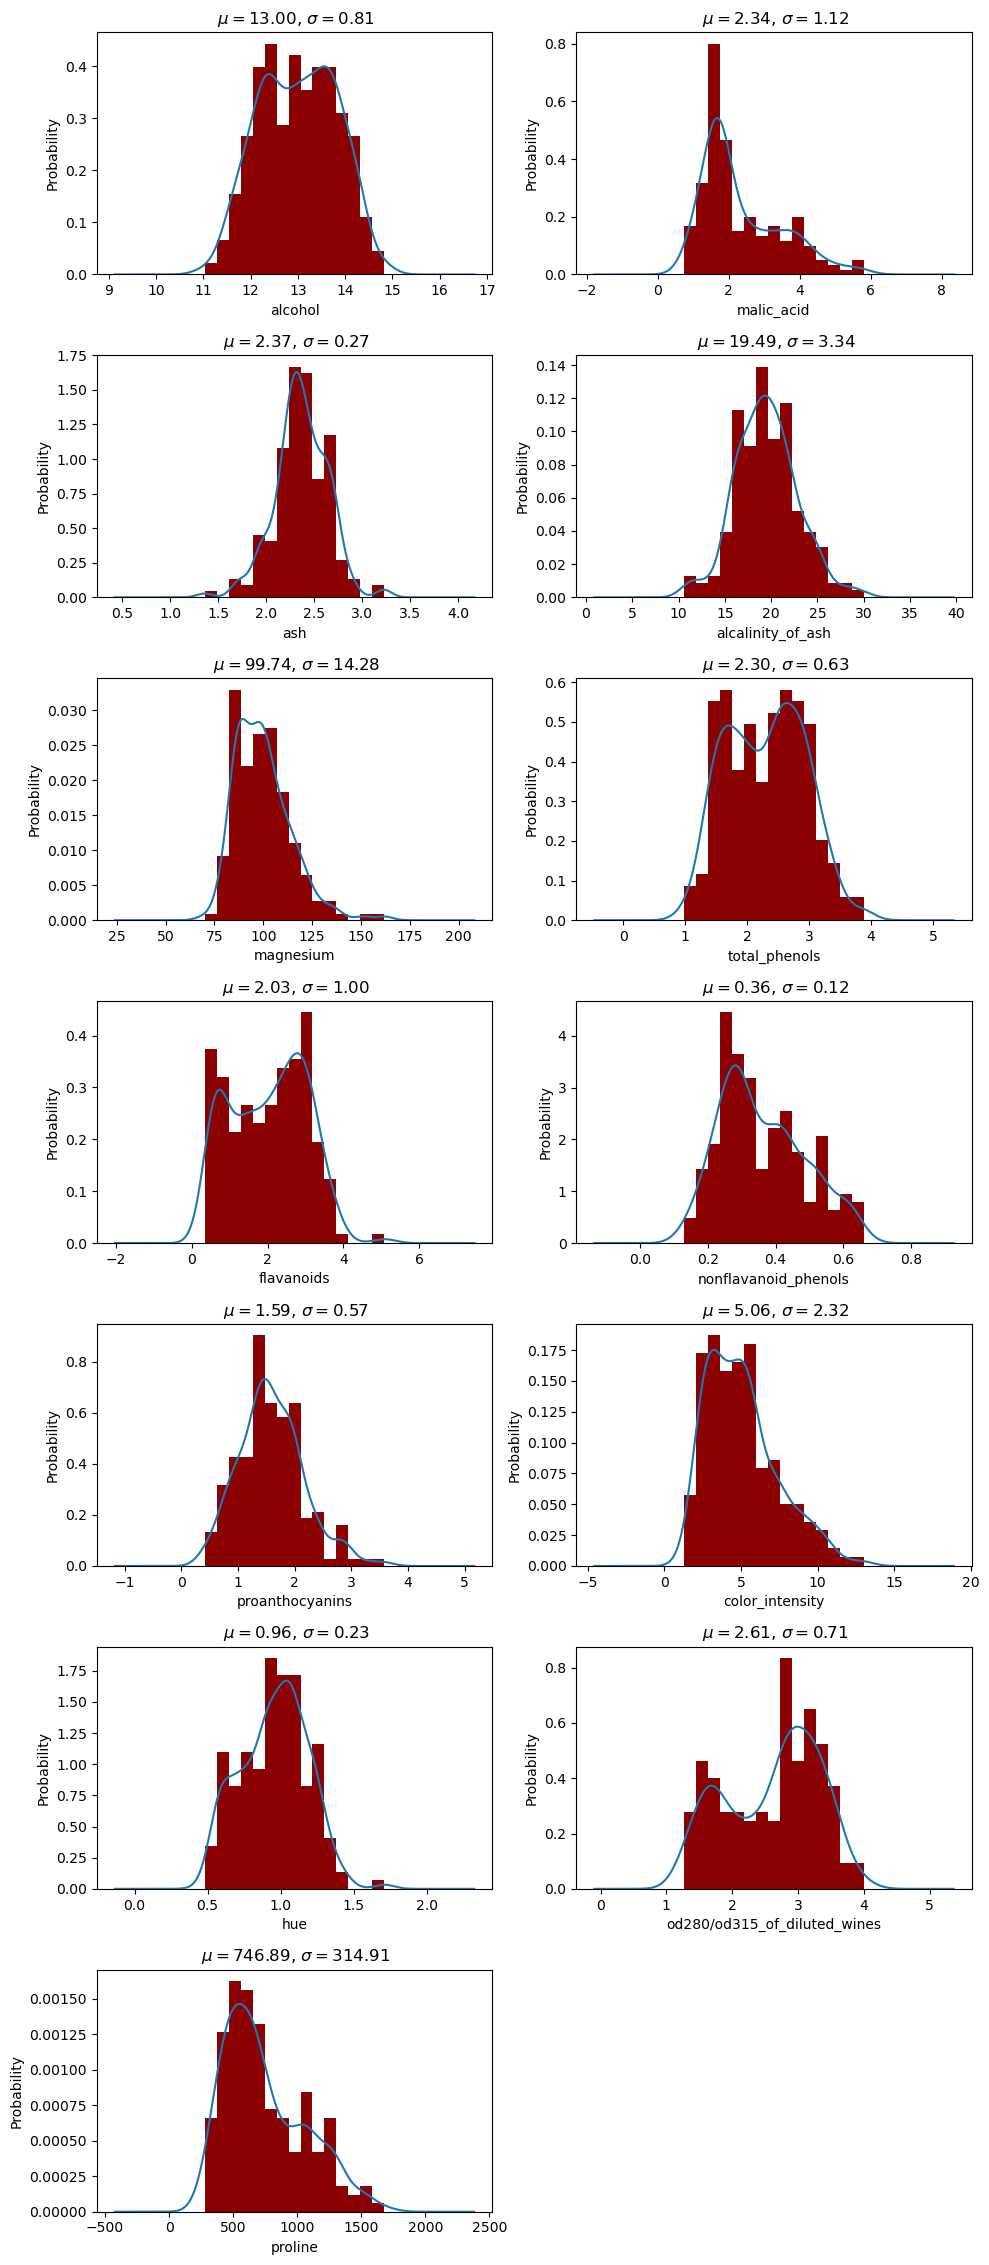

In [15]:
h =[]
nfeatures = len(features)
f = plt.figure(figsize=(10,1.75*nfeatures))
for nth_feat, feature in enumerate(features):
    plt.subplot(int(nfeatures/2)+1, 2, nth_feat+1)
    colm = data[feature]
    hsub = h.append(colm.hist(color='darkRed', density=True, bins=15))
    colm.plot.kde(bw_method=0.3) # estimate pdf using KDE
    plt.xlabel(feature)
    plt.ylabel("Probability")
    mu = colm.mean()
    sigma = colm.std()
    plt.title(f" $\mu = {mu:.2f}$, $\sigma = {sigma:.2f}$ ")
plt.tight_layout()
plt.show()
plt.close()